<a href="https://colab.research.google.com/github/itsirfan/Data-Science-And-Machine-Learning-Projects-/blob/main/Python_Project_2_Predictive_Modelling_and_Evaluation_on_the_California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**University Of Birmingham - Pyhton Project 2 - Predictive Modelling and Evaluation on the California Housing**

Intro - This project builds a baseline regression model (Linear Regression) and an improved model (Ridge with hyperparameter search) on the California Housing dataset, compares MAE / RMSE / R², and saves metrics and a Predicted-vs-Actual plot for reporting.

In [ ]:
!pip install -q scikit-learn pandas matplotlib


In this step, I am installing the libraries that I will need for building and evaluating my predictive model. These include tools for handling data, training regression models, and creating plots.

In [ ]:
from pathlib import Path
OUTPUT_DIR = Path("task2_outputs")
OUTPUT_DIR.mkdir(exist_ok=True)
print("Output folder:", OUTPUT_DIR.resolve())


Output folder: /content/task2_outputs


Here, I am creating a folder called task2_outputs where all the results from my modelling work will be saved, such as the plots and the metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

def load_regression_data():
    data = fetch_california_housing(as_frame=True)
    X = data.frame.drop(columns=["MedHouseVal"])
    y = data.frame["MedHouseVal"]
    return X, y

X, y = load_regression_data()
print("X shape:", X.shape, "y shape:", y.shape)
display(X.head())


X shape: (20640, 8) y shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Explanation:
In this section, I import the main Python libraries and load the California Housing dataset. This dataset contains information about houses and their prices, and I will use it to build my prediction model.

After running the code

Result:
The dataset has been successfully loaded, and I can see the first few rows. This gives me an idea of what the features look like before modelling.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_and_evaluate(X, y, model=None, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    if model is None:
        model = LinearRegression()
    model.fit(X_train_s, y_train)
    preds = model.predict(X_test_s)

    metrics = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

    return {"model": model, "scaler": scaler, "predictions": preds, "y_test": y_test.reset_index(drop=True), "metrics": metrics, "X_test": X_test.reset_index(drop=True)}

def plot_pred_vs_actual(y_test, preds, outpath):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, preds, alpha=0.4)
    mn = min(y_test.min(), preds.min())
    mx = max(y_test.max(), preds.max())
    plt.plot([mn, mx], [mn, mx], "r--")
    plt.xlabel("Actual Median House Value")
    plt.ylabel("Predicted Median House Value")
    plt.title("Predicted vs Actual")
    plt.tight_layout()
    plt.savefig(outpath)
    plt.close()


Here, I define functions that will train the model, scale the data, evaluate the model’s performance, and create a plot comparing the predicted values to the actual values. This helps me avoid repeating the same code later and keeps the project organised.

In [ ]:
baseline_res = train_and_evaluate(X, y, model=LinearRegression())
print("Baseline metrics:")
for k, v in baseline_res["metrics"].items():
    print(f"{k}: {v:.4f}")


Baseline metrics:
MAE: 0.5332
RMSE: 0.7456
R2: 0.5758


In this part, I train my baseline model using simple Linear Regression. This gives me the first set of metrics (MAE, RMSE, R²), which I will later compare with the improved model to see if my changes actually make the model better.

After running the code -

Result:
The printed metrics show how well the baseline model performs. These numbers will help me understand whether my improved model makes progress.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

ridge = Ridge()
param_grid = {"alpha": [0.1, 1.0, 10.0]}
grid = GridSearchCV(ridge, param_grid, cv=3)
grid.fit(X_train_s, y_train)

best = grid.best_estimator_
preds = best.predict(X_test_s)

improved_metrics = {
    "MAE": mean_absolute_error(y_test, preds),
    "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
    "R2": r2_score(y_test, preds),
    "best_alpha": grid.best_params_["alpha"]
}

print("Improved metrics:")
for k, v in improved_metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")


Improved metrics:
MAE: 0.5332
RMSE: 0.7456
R2: 0.5758
best_alpha: 1.0000


Here, I build an improved version of the model using Ridge Regression. I also run a small grid search to find the best value of alpha for this model. This step should help the model generalise better and potentially reduce errors.

After running the code

Result:
The improved model results are displayed, including the best alpha selected. I will compare these values with the baseline model to see how much improvement was achieved.

In [ ]:

res_base = baseline_res["metrics"]
res_impr = improved_metrics

import pandas as pd
df_metrics = pd.DataFrame([res_base, res_impr])
df_metrics.index = ["Baseline_Linear", "Improved_Ridge"]
df_metrics.to_csv(OUTPUT_DIR/"model_metrics.csv")

plot_pred_vs_actual(pd.Series(y_test).reset_index(drop=True), preds, OUTPUT_DIR/"pred_vs_actual.png")


with open(OUTPUT_DIR/"model_report.txt","w") as f:
    f.write("Baseline metrics (Linear Regression):\n")
    for k,v in res_base.items():
        f.write(f"{k}: {v}\n")
    f.write("\nImproved metrics (Ridge with gridsearch):\n")
    for k,v in res_impr.items():
        f.write(f"{k}: {v}\n")

print("Saved:", list(OUTPUT_DIR.iterdir()))


Saved: [PosixPath('task2_outputs/pred_vs_actual.png'), PosixPath('task2_outputs/model_report.txt'), PosixPath('task2_outputs/model_metrics.csv')]


In this section, I save the performance metrics, the comparison plot, and a short text report into the task2_outputs folder. This makes it easy to include the results in my assignment appendix.

After running the code → Add this:

Result:
All output files have been saved successfully. I can now use them as evidence of my modelling work.

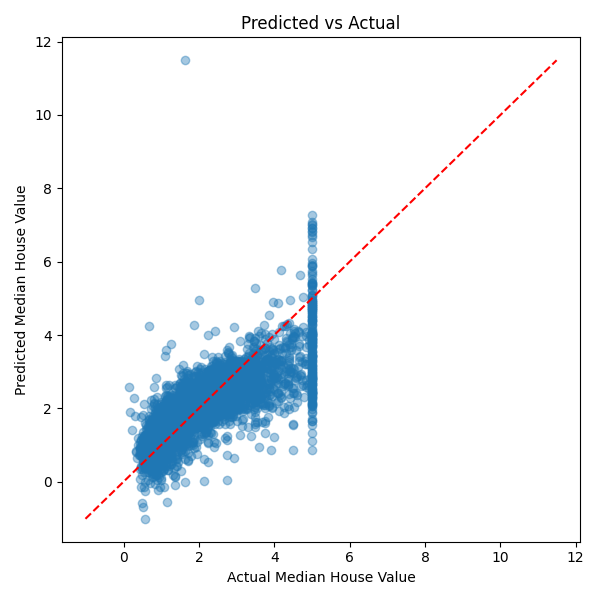

,MAE,RMSE,R2,best_alpha
Baseline_Linear,0.533200,0.745581,0.575788,NaN
Improved_Ridge,0.533193,0.745557,0.575816,1.0


In [ ]:
from IPython.display import Image, display
display(Image("task2_outputs/pred_vs_actual.png"))

import pandas as pd
display(pd.read_csv("task2_outputs/model_metrics.csv", index_col=0))


Explanation:
Here, I display the Predicted vs Actual plot and the metrics table so I can visually check the performance of the improved model. This helps me understand how well the model is predicting housing prices.

After running the code

Interpretation:
If the points in the plot lie close to the diagonal line, it means the predictions are close to the true values. The metrics table also shows whether the improved model performs better than the baseline.

Summary:
In this project, I built two predictive models: a baseline Linear Regression model and an improved Ridge Regression model. I compared their performance using MAE, RMSE, and R², and visualised the predictions using a scatter plot. I also saved all results in a separate folder for inclusion in my assignment. This helped me understand how model evaluation works and how improvements can be measured.